In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Question 1 - Identify the output variable

In [3]:
for i in df_train.columns:
    if i not in df_test.columns:
        print("Our Target variable is {}".format(i))

Our Target variable is Target


In [4]:
df_train['Target'].unique()

array([4, 2, 3, 1])

# Question 2 - Understand the type of data

In [5]:
print('Train Set Shape :', df_train.shape)
print('Test Set Shape :', df_test.shape)

Train Set Shape : (9557, 143)
Test Set Shape : (23856, 142)


In [6]:
print(df_train.dtypes.value_counts())

int64      130
float64      8
object       5
dtype: int64


In [7]:
print(df_test.dtypes.value_counts())

int64      129
float64      8
object       5
dtype: int64


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [10]:
### List the columns for different datatypes:
print('Integer Type: ')
print(df_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(df_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(df_train.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


# Question 3 - Check if there are any biases in your dataset.

<AxesSubplot:title={'center':'Target vs Total_Count'}>

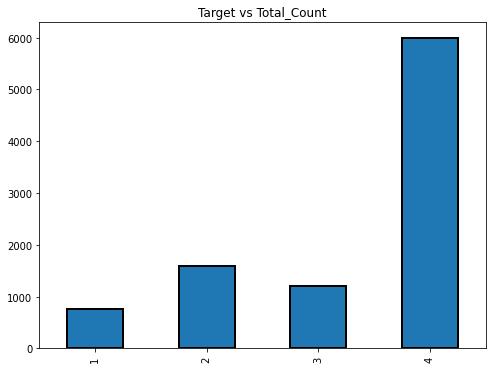

In [11]:
#Bias with respect to target varaible
target_counts = df_train['Target'].value_counts().sort_index()
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")

# extreme poverty is the smallest count in the train dataset. The dataset is biased

# Question 4 - Check whether all members of the house have the same poverty level

In [12]:
# 'idhogar' column = Household level identifier 

unique_values = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
different_households = unique_values[unique_values != True]
print('There are {} households where the family members do not all have the same target.'.format(len(different_households)))

There are 85 households where the family members do not all have the same target.


In [13]:
df_train[df_train['idhogar'] == different_households.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


# Question 5 - Check if there is a house without a family head.

In [14]:
check_leader = df_train.groupby('idhogar')['parentesco1'].sum()

#Check for head
no_head = df_train.loc[df_train['idhogar'].isin(check_leader[check_leader == 0].index), :]
print('There are {} households without a head.'.format(no_head['idhogar'].nunique()))

There are 15 households without a head.


In [15]:
# Check for households with no heads but have different labels.

no_head_equal = no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(no_head_equal == False)))

0 Households with no head have different labels.


There is no household which has no head and the family members have different labels

# Question 6 - Set poverty level of the members and the head of the house within a family.

In [16]:
#iterate for each houehold
for each_household in different_households.index:
    
    #find the correct label
    true_target = int(df_train[(df_train['idhogar'] == each_household) & (df_train['parentesco1'] == 1.0)]
                      ['Target'])
    
    #assign the correct label for each member
    df_train.loc[df_train['idhogar'] == each_household, 'Target'] = true_target

unique_values = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
different_households = unique_values[unique_values != True]
print('There are {} households where the family members do not all have the same target.'.format(len(different_households)))

There are 0 households where the family members do not all have the same target.


# Question 7 - Count how many null values are existing in columns.

In [17]:
#train data
null_counts = df_train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

rez_esc      7928
v18q1        7342
v2a1         6860
SQBmeaned       5
meaneduc        5
dtype: int64

In [18]:
#test data
null_counts = df_test.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

rez_esc      19653
v18q1        18126
v2a1         17403
SQBmeaned       31
meaneduc        31
dtype: int64

In [19]:
#filling Null values in train data
df_train['SQBmeaned'].fillna(df_train['SQBmeaned'].median(), inplace = True)
df_train['meaneduc'].fillna(df_train['meaneduc'].median(), inplace = True)
df_train['v18q1'] = df_train['v18q1'].fillna(0)
df_train['rez_esc'] = df_train['rez_esc'].fillna(0)
df_train['v2a1'] = df_train['v2a1'].fillna(0)

In [20]:
#filling Null values in test data
df_test['SQBmeaned'].fillna(df_test['SQBmeaned'].median(), inplace = True)
df_test['meaneduc'].fillna(df_test['meaneduc'].median(), inplace = True)
df_test['v18q1'] = df_test['v18q1'].fillna(0)
df_test['rez_esc'] = df_test['rez_esc'].fillna(0)
df_test['v2a1'] = df_test['v2a1'].fillna(0)

In [21]:
print("Null values in train data:",df_train.isna().sum().sum())
print("Null values in test data:",df_test.isna().sum().sum())

Null values in train data: 0
Null values in test data: 0


# Question 8 - Remove null value rows of the target variable

In [22]:
print("Null values in target varaible",df_train['Target'].isnull().sum())

Null values in target varaible 0


# Question 9 - Predict the accuracy using random forest classifier

In [23]:
del_cols = ['Id','idhogar','dependency','edjefe','edjefa']

df_train.drop(columns = del_cols ,inplace =True)
df_test.drop(columns = del_cols ,inplace =True)
print("Shape of train data",df_train.shape)
print("Shape of test data",df_test.shape)

Shape of train data (9557, 138)
Shape of test data (23856, 137)


In [24]:
X = df_train.drop(['Target'],axis =1)
y = df_train.Target

In [25]:
X.shape

(9557, 137)

In [26]:
y.shape

(9557,)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [29]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 137 entries, v2a1 to agesq
dtypes: float64(8), int64(129)
memory usage: 10.0 MB


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9201534170153417
[[ 193    6    1   44]
 [   4  398    4   73]
 [   1    6  255   79]
 [   0    4    7 1793]]
              precision    recall  f1-score   support

           1       0.97      0.79      0.87       244
           2       0.96      0.83      0.89       479
           3       0.96      0.75      0.84       341
           4       0.90      0.99      0.95      1804

    accuracy                           0.92      2868
   macro avg       0.95      0.84      0.89      2868
weighted avg       0.92      0.92      0.92      2868



In [32]:
#predicting using test.csv file
test_data_prediction = rf.predict(df_test)
test_data_prediction

array([4, 4, 4, ..., 4, 4, 4])

# test_data_prediction is the target predicted for test.csv

# Question 10 - Check the accuracy using random forest with cross validation

In [33]:
#Prediction using Cross validation
from sklearn.model_selection import KFold,cross_val_score,cross_validate

In [34]:
kfold = KFold(n_splits=10 , random_state=12 , shuffle =True)

In [35]:
results =  cross_val_score(estimator=rf, 
                              X=X, 
                              y=y, 
                              cv=kfold, 
                              scoring='accuracy')

In [36]:
print('K-Fold accuracy scores : \n', results)
print('Mean score : \n', results.mean())

K-Fold accuracy scores : 
 [0.93723849 0.93410042 0.9539749  0.93619247 0.93723849 0.94560669
 0.94246862 0.95287958 0.94136126 0.93612565]
Mean score : 
 0.9417186575828606


# With Cross Validation we get 94%